In [1]:
#En un notebook desarrolle un modelo o modelos que permita predecir el nivel de presión sonora a escala en decibelios. 
#En cada caso debe colocar la forma en la que se recuperan los datos, análisis exploratorio de los datos, transformación 
#de datos si fuera el caso, selección del conjunto de entrenamiento y prueba, evaluación del modelo o modelos 
#desarrollados y conclusión sobre el mejor modelo elegido

In [2]:
#importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Recuperación de datos

In [3]:
#datos=pd.read_csv('airfoil_self_noise.dat')
columnas = ['Frecuencia',
           'AnguloDeAtaque',
           'LongitudDeLaCuerda',
           'VelocidadDeFlujoLibre',
           'EspesorDeDesplazamiento',
           'NivelDePresion']

datos = pd.read_csv('airfoil_self_noise.dat', sep='\t', names=columnas)

## Entrenando el Modelo de Regresión Lineal

### arreglos X e y

In [4]:
X = datos[['Frecuencia', 'AnguloDeAtaque', 'LongitudDeLaCuerda',
       'VelocidadDeFlujoLibre', 'EspesorDeDesplazamiento']]
y = datos['NivelDePresion']

### Dividir datos de entrenamiento y prueba

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                    test_size=0.3,
                                                    random_state=50)

### Crear y Entrenar el Modelo

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Evaluación del Modelo

In [8]:
# imprime el interceptor
print("Beta 0 =",lm.intercept_)

Beta 0 = 133.42275287577456


In [9]:
X.columns

Index(['Frecuencia', 'AnguloDeAtaque', 'LongitudDeLaCuerda',
       'VelocidadDeFlujoLibre', 'EspesorDeDesplazamiento'],
      dtype='object')

In [10]:
lm.coef_

array([-1.27074275e-03, -4.92657276e-01, -3.63405069e+01,  9.33080236e-02,
       -1.23542078e+02])

In [11]:
coeff_df = pd.DataFrame(lm.coef_,index=X.columns,columns=['Coeficiente'])
coeff_df

,Coeficiente
Frecuencia,-0.001271
AnguloDeAtaque,-0.492657
LongitudDeLaCuerda,-36.340507
VelocidadDeFlujoLibre,0.093308
EspesorDeDesplazamiento,-123.542078


## Predicciones de nuestro modelo

In [12]:
X_test.head()

,Frecuencia,AnguloDeAtaque,LongitudDeLaCuerda,VelocidadDeFlujoLibre,EspesorDeDesplazamiento
914,3150,15.4,0.0508,39.6,0.028259
959,2500,19.7,0.0508,39.6,0.036484
1010,4000,4.8,0.0254,71.3,0.000849
49,250,0.0,0.3048,31.7,0.003313
1317,8000,3.3,0.1016,55.5,0.002211


In [13]:
predictions = lm.predict(X_test)
predictions

array([120.1906785 , 117.88213847, 131.59999828, 124.57709213,
       122.84429016, 127.48052377, 114.15288263, 113.07275129,
       127.38655778, 119.45519668, 124.55981656, 120.3950623 ,
       123.41928375, 118.57569199, 126.15844333, 129.45445637,
       131.98111373, 122.14774273, 124.41747709, 125.35651298,
       123.55045957, 130.54009865, 123.99818066, 118.83488211,
       131.47513457, 137.12144282, 123.81824777, 131.4218037 ,
       125.24245181, 120.58512854, 126.2955933 , 124.53816767,
       125.15594936, 132.12940703, 124.21702908, 124.47840222,
       126.6565184 , 121.33742683, 123.18419634, 123.5136989 ,
       128.85081844, 132.66417972, 126.72235947, 126.88424784,
       119.70147066, 132.63234403, 125.00788755, 116.56729385,
       127.49409786, 125.71215615, 127.2446465 , 125.14322378,
       131.56924127, 127.81159606, 124.97214251, 121.85249623,
       133.06905988, 123.49878082, 131.4254287 , 119.14518602,
       116.18783885, 132.21436592, 127.9409657 , 126.10

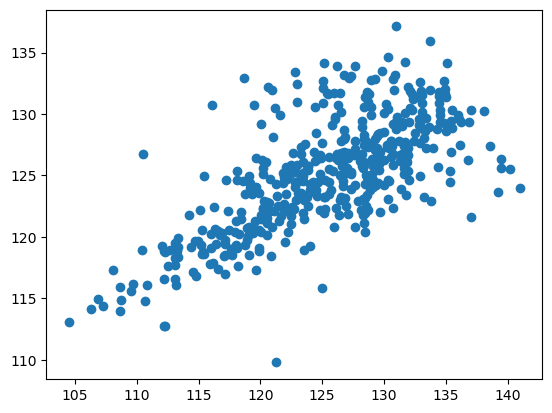

In [14]:
plt.scatter(y_test,predictions)

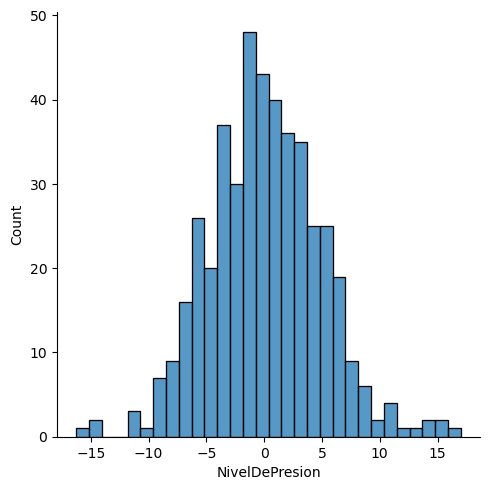

In [15]:
sns.displot((y_test-predictions),bins=30);

### Evaluación del modelo

In [16]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.799498369178097
MSE: 23.629625707470634
RMSE: 4.861031341955186


### Residuales


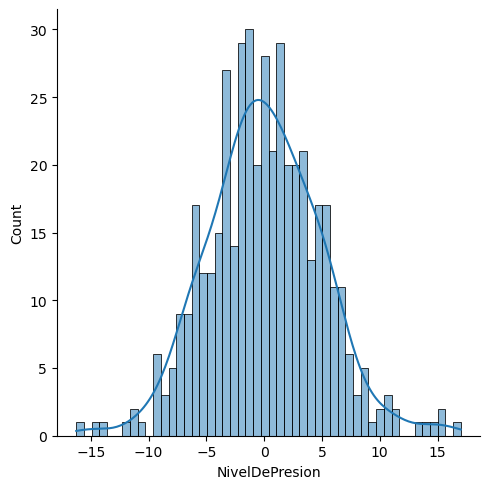

In [17]:
sns.displot((y_test-predictions),bins=50,kde=True);

### Conclusiones

In [18]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coeff_df

,Coeficiente
Frecuencia,-0.001271
AnguloDeAtaque,-0.492657
LongitudDeLaCuerda,-36.340507
VelocidadDeFlujoLibre,0.093308
EspesorDeDesplazamiento,-123.542078


Se escogió el modelo de Regresion Lineal porque para la prediccion de datos de la presión esta en base a otras entradas, dando como resultado que la carateristica de velocidad de flujo libre es la que tiene mayor impacto para el aumento de la presion sonora y el espesor de desplazamiento en el que tiene menor impacto para el aumento de la presion sonora 